---
title: Interactive notebooks

description: MyST allows you to include interactive visualizations directly in your projects using Jupyter Notebooks.

thumbnail: ./thumbnails/interactive-notebooks.png

exports:
  - format: pdf

---

MyST allows you to directly include Jupyter Notebooks in your books, documents and websites. This page of the documentation is actually a Jupyter Notebook that is rendered directly using MyST.

For example, let us import `altair` and create a demo of an interactive plot!

In [1]:
import panel as pn
pn.extension('vega')

def _repr_png_(self):

    import io
    with io.BytesIO() as cap:
        x = pn.Row(pn.Spacer(width=100), self, pn.Spacer(width=100))
        x.save(cap, as_png=True)
        return cap.getvalue()

pn.viewable.Viewable._repr_png_ = _repr_png_

In [2]:
import altair as alt
from vega_datasets import data

source = data.cars()
brush = alt.selection_interval(encodings=['x'])
points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    size='Acceleration',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(brush)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(brush)

We can now plot the `altair` example, which is fully interactive, try dragging in the plot to select cars by their horsepower.

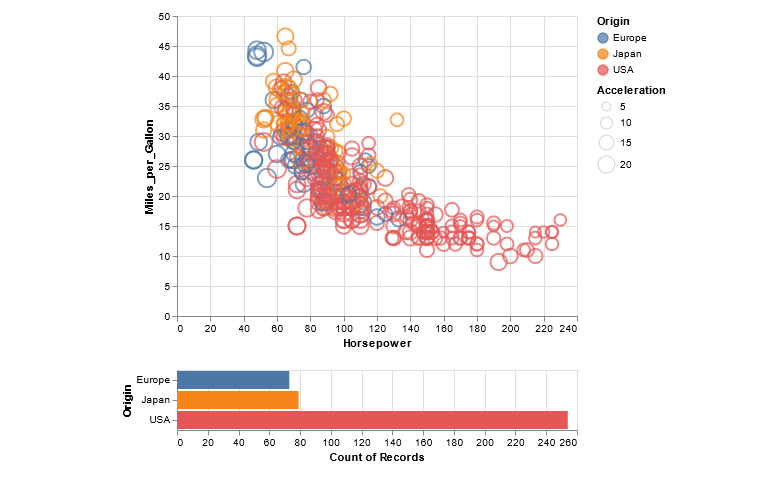

In [5]:
#| label: altair-horsepower
pn.Row(points & bars)

## Including your notebook

If you are working with Jupyter `*.ipynb` files, just move your notebooks into the project folder or list them in your table of contents to get them to show up in your website or as a document. `myst` will then include your notebook in parsing, and show the full results as soon as you save your notebook, including any interactive figures.

To customize the title and other frontmatter, ensure the first Jupyter Notebook cell is a markdown or raw cell, and only includes a `YAML` frontmatter block.

```{note}
If you are using a markdown, this might not render great in some platforms with extensions, and we aim to help out in the Jupyter ecosystem by providing a frontmatter plugin in the future.
```